In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf

INFO:tensorflow:Enabling eager execution
INFO:tensorflow:Enabling v2 tensorshape
INFO:tensorflow:Enabling resource variables
INFO:tensorflow:Enabling tensor equality
INFO:tensorflow:Enabling control flow v2


In [2]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [3]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [4]:
# check missing value
train.isnull().sum()

Gender               0
Income               0
Education            3
Dependents           0
Marital Status       0
Employment Status    0
Mortgage             0
Resident             1
Credit               1
Risk Status          0
dtype: int64

1. Gender : Male/Female
2. Income : Applicant income (10000 - 500000)
3. Education : Applicant Education Level (Bachelor, Master, Doctorate, Others)
4. Dependent : Number of dependents
5. Marital Status : Single, Married, Divorced, Widowed, Separated
6. Employment Status: Employed, Employed Part-time, Self-employed, Unemployed, Retired, Others
7. Mortgage : Yes/No #การจำนอง
8. Resident : Urban/Semi-urban/Rural
9. Credit : Credit history meets guidelines (Yes/No)
10. Risk Status: 1/2/3/4/5 (1 = lowest risk, 5 = highest risk)

In [5]:
# input missing data with mode
train['Education'] = train['Education'].fillna('Bachelor')
train['Resident'] = train['Resident'].fillna('Urban')
train['Credit'] = train['Credit'].fillna('Yes')

No missing value in test data so I didn't clean

In [6]:
# check missing value again
train.isnull().sum()

Gender               0
Income               0
Education            0
Dependents           0
Marital Status       0
Employment Status    0
Mortgage             0
Resident             0
Credit               0
Risk Status          0
dtype: int64

In [7]:
train

In [8]:
train = train.loc[lambda train: (train['Income'] > 1) & (train['Income'] < 185000)]
train

,Gender,Income,Education,Dependents,Marital Status,Employment Status,Mortgage,Resident,Credit,Risk Status
0,Male,28000,Others,0,Divorced,Retired,Yes,Semi-urban,No,4
1,Female,42000,Bachelor,2,Separated,Self-employed,No,Urban,No,3
2,Male,52000,Bachelor,0,Divorced,Others,Yes,Urban,No,3
3,Male,64000,Master,1,Single,Others,Yes,Urban,No,3
4,Female,126000,Master,1,Divorced,Self-employed,No,Urban,Yes,2
...,...,...,...,...,...,...,...,...,...,...
2800,Female,115000,Bachelor,1,Married,Self-employed,Yes,Urban,Yes,2
2801,Female,47000,Bachelor,3,Single,Unemployed,Yes,Urban,Yes,4
2802,Male,22000,Master,2,Married,Self-employed,Yes,Semi-urban,No,3
2803,Male,42000,Others,3,Divorced,Employed,No,Semi-urban,Yes,4


In [9]:
# train.head()

In [10]:
# train.columns

In [11]:
# train.info()

In [12]:
# choose column for train
data = train.drop(['Risk Status','Gender','Credit'],1)
y=train['Risk Status']

In [13]:
# to make the same format like train data
data_test=test.drop(['Risk Status','Gender','Credit'],1)
data_test

,Income,Education,Dependents,Marital Status,Employment Status,Mortgage,Resident
0,51000,Bachelor,1,Married,Others,Yes,Semi-urban
1,48000,Master,2,Widowed,Employed,Yes,Urban
2,26000,Others,2,Married,Part-time,Yes,Urban
3,32000,Others,1,Separated,Others,Yes,Urban
4,110000,Doctorate,1,Single,Employed,No,Semi-urban
...,...,...,...,...,...,...,...
345,66000,Doctorate,1,Divorced,Self-employed,Yes,Semi-urban
346,52000,Bachelor,0,Single,Employed,Yes,Urban
347,23000,Others,0,Single,Others,Yes,Semi-urban
348,16000,Master,3,Married,Others,Yes,Rural


In [14]:
# One-hot train data
categoricalFeatures = ['Education', 'Employment Status', 'Mortgage', 'Marital Status', 'Resident']

# Iterate through the list of categorical features and one hot encode them.
for feature in categoricalFeatures:
    onehot = pd.get_dummies(data[feature], prefix=feature)
    data = data.drop(feature, axis=1)
    data = data.join(onehot)

In [15]:
# One-hot test data
categoricalFeatures = ['Education', 'Employment Status', 'Mortgage', 'Marital Status', 'Resident']

# Iterate through the list of categorical features and one hot encode them.
for feature in categoricalFeatures:
    onehot = pd.get_dummies(data_test[feature], prefix=feature)
    data_test = data_test.drop(feature, axis=1)
    data_test = data_test.join(onehot)

In [16]:
# Normalization train data
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(data[['Income']])
data[['Income']]=scaler.transform(data[['Income']])

In [17]:
# Normalization test data
scaler_test = MinMaxScaler()
scaler_test.fit(data_test[['Income']])
data_test[['Income']]=scaler.transform(data_test[['Income']])

In [18]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data, y, test_size=0.2) 

In [19]:
# y_train.value_counts()

In [20]:
# create model
model = tf.keras.Sequential() # เหมือนการสร้าง list แล้วค่อยๆ add ของเข้ามา
model.add(tf.keras.layers.Dense(70,activation='relu')) 
model.add(tf.keras.layers.Dense(60,activation='relu'))
model.add(tf.keras.layers.Dense(6,activation='softmax'))

In [21]:
# complied model
model.compile(optimizer=tf.keras.optimizers.Adamax(learning_rate=0.001),loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False), metrics=['accuracy'])

In [22]:
# train model
model.fit(X_train, y_train, epochs=70, batch_size=32, validation_split=0.2)

Epoch 1/70
56/56 [==============================] - 1s 4ms/step - loss: 1.4902 - accuracy: 0.4399 - val_loss: 1.1932 - val_accuracy: 0.6116
Epoch 2/70
56/56 [==============================] - 0s 1ms/step - loss: 1.0086 - accuracy: 0.6065 - val_loss: 0.9115 - val_accuracy: 0.6808
Epoch 3/70
56/56 [==============================] - 0s 1ms/step - loss: 0.8006 - accuracy: 0.6982 - val_loss: 0.7717 - val_accuracy: 0.7679
Epoch 4/70
56/56 [==============================] - 0s 1ms/step - loss: 0.6740 - accuracy: 0.7708 - val_loss: 0.6758 - val_accuracy: 0.7946
Epoch 5/70
56/56 [==============================] - 0s 1ms/step - loss: 0.5864 - accuracy: 0.8072 - val_loss: 0.6032 - val_accuracy: 0.8527
Epoch 6/70
56/56 [==============================] - 0s 1ms/step - loss: 0.5222 - accuracy: 0.8340 - val_loss: 0.5518 - val_accuracy: 0.8549
Epoch 7/70
56/56 [==============================] - 0s 1ms/step - loss: 0.4725 - accuracy: 0.8569 - val_loss: 0.5092 - val_accuracy: 0.8772
Epoch 8/70
56/56 [==

56/56 [==============================] - 0s 1ms/step - loss: 0.0752 - accuracy: 0.9782 - val_loss: 0.1220 - val_accuracy: 0.9531
Epoch 60/70
56/56 [==============================] - 0s 1ms/step - loss: 0.0752 - accuracy: 0.9804 - val_loss: 0.1237 - val_accuracy: 0.9509
Epoch 61/70
56/56 [==============================] - 0s 1ms/step - loss: 0.0723 - accuracy: 0.9810 - val_loss: 0.1332 - val_accuracy: 0.9420
Epoch 62/70
56/56 [==============================] - 0s 1ms/step - loss: 0.0715 - accuracy: 0.9827 - val_loss: 0.1206 - val_accuracy: 0.9464
Epoch 63/70
56/56 [==============================] - 0s 1ms/step - loss: 0.0706 - accuracy: 0.9821 - val_loss: 0.1235 - val_accuracy: 0.9442
Epoch 64/70
56/56 [==============================] - 0s 1ms/step - loss: 0.0691 - accuracy: 0.9827 - val_loss: 0.1185 - val_accuracy: 0.9442
Epoch 65/70
56/56 [==============================] - 0s 1ms/step - loss: 0.0686 - accuracy: 0.9843 - val_loss: 0.1217 - val_accuracy: 0.9509
Epoch 66/70
56/56 [======

In [23]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 70)                1610      
_________________________________________________________________
dense_1 (Dense)              (None, 60)                4260      
_________________________________________________________________
dense_2 (Dense)              (None, 6)                 366       
Total params: 6,236
Trainable params: 6,236
Non-trainable params: 0
_________________________________________________________________


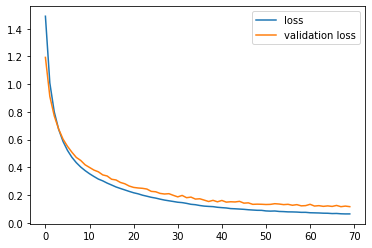

In [24]:
plt.plot(model.history.history['loss'],label='loss')
plt.plot(model.history.history['val_loss'],label='validation loss')
plt.legend()
plt.show()

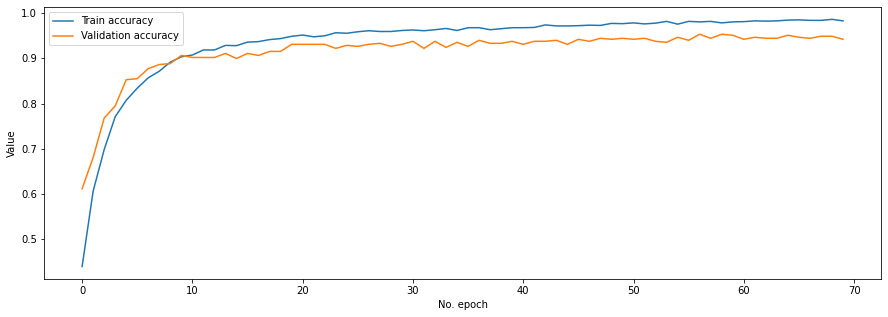

In [25]:
plt.figure(figsize=(15,5))
plt.plot(model.history.history['accuracy'], label='Train accuracy')
plt.plot(model.history.history['val_accuracy'], label='Validation accuracy')
plt.ylabel('Value')
plt.xlabel('No. epoch')
plt.legend()
plt.show()

In [26]:
# model.predict(X_test)

In [27]:
model.predict(data_test)

array([[1.3598383e-07, 1.5108186e-14, 1.0054837e-07, 9.9890018e-01,
        1.0994558e-03, 9.2372446e-08],
       [9.2399279e-07, 2.0632970e-06, 7.4233520e-01, 2.5766185e-01,
        1.0211844e-09, 2.0998149e-13],
       [5.5722534e-08, 5.2922178e-17, 3.4682587e-10, 7.7086586e-01,
        2.2904702e-01, 8.6999040e-05],
       ...,
       [4.3494819e-10, 2.3382788e-21, 1.5470649e-14, 4.0174001e-03,
        9.9583876e-01, 1.4382438e-04],
       [2.8567830e-11, 1.2546247e-24, 1.1991141e-16, 6.5630028e-04,
        9.9892873e-01, 4.1498110e-04],
       [3.8962931e-09, 1.8475790e-04, 9.9976820e-01, 4.7107806e-05,
        7.1713986e-16, 1.1244539e-18]], dtype=float32)

In [28]:
# y_predict = np.argmax(model.predict(X_test),axis=1)

In [29]:
# choosing the most probability to be y_predict_test
y_predict_test = np.argmax(model.predict(data_test),axis=1)

In [30]:
# pd.DataFrame(y_predict).value_counts()

In [31]:
pd.DataFrame(y_predict_test).value_counts()

3    139
2    130
4     80
1      1
dtype: int64

In [32]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [33]:
# look at 10th fisrt data between true data and predict data
# y_predict[:10], np.array(y_test[:10])

In [34]:
# print(classification_report(y_test,y_predict))

In [35]:
# print(confusion_matrix(y_test,y_predict))

In [36]:
test.drop(['Risk Status'],1)

,Gender,Income,Education,Dependents,Marital Status,Employment Status,Mortgage,Resident,Credit
0,Male,51000,Bachelor,1,Married,Others,Yes,Semi-urban,No
1,Male,48000,Master,2,Widowed,Employed,Yes,Urban,Yes
2,Female,26000,Others,2,Married,Part-time,Yes,Urban,No
3,Female,32000,Others,1,Separated,Others,Yes,Urban,No
4,Male,110000,Doctorate,1,Single,Employed,No,Semi-urban,Yes
...,...,...,...,...,...,...,...,...,...
345,Male,66000,Doctorate,1,Divorced,Self-employed,Yes,Semi-urban,Yes
346,Female,52000,Bachelor,0,Single,Employed,Yes,Urban,Yes
347,Female,23000,Others,0,Single,Others,Yes,Semi-urban,Yes
348,Female,16000,Master,3,Married,Others,Yes,Rural,Yes


In [37]:
test['Risk Status'] = y_predict_test
test

,Gender,Income,Education,Dependents,Marital Status,Employment Status,Mortgage,Resident,Credit,Risk Status
0,Male,51000,Bachelor,1,Married,Others,Yes,Semi-urban,No,3
1,Male,48000,Master,2,Widowed,Employed,Yes,Urban,Yes,2
2,Female,26000,Others,2,Married,Part-time,Yes,Urban,No,3
3,Female,32000,Others,1,Separated,Others,Yes,Urban,No,3
4,Male,110000,Doctorate,1,Single,Employed,No,Semi-urban,Yes,2
...,...,...,...,...,...,...,...,...,...,...
345,Male,66000,Doctorate,1,Divorced,Self-employed,Yes,Semi-urban,Yes,2
346,Female,52000,Bachelor,0,Single,Employed,Yes,Urban,Yes,2
347,Female,23000,Others,0,Single,Others,Yes,Semi-urban,Yes,4
348,Female,16000,Master,3,Married,Others,Yes,Rural,Yes,4


In [38]:
test.to_csv('test_nongNing.csv')